# Matching astrometrical catalogs

In [1]:
"""import libraries"""

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


import glob

In [2]:
"""define tables path and names"""

dirpath = './files/'

files = glob.glob(dirpath + '*.csv')


"""columns use for matching"""

c2m = ['RAJ2000','DEJ2000']


"""Threshold"""

th = 10./3600.

In [3]:
"""Reading and sorting tables"""

df = [pd.read_csv(f) for f in glob.glob(dirpath + '*.csv')]

"""Sorting"""

df.sort(key=len, reverse=False)

coords1, coords2 = df[0][c2m], df[1][c2m]
coords1.columns = coords2.columns = ['x', 'y']

coords1 = coords1.sort_values(by=['x'])
coords2 = coords2.sort_values(by=['x'])

$$d = \sqrt{\left[ (\alpha_{A} - \alpha_{B})\cdot\cos(\delta_{B}) \right] ^2 + (\delta_{A} - \delta_{B})^2}$$

In [4]:
def dst(t1,t2):
    return np.sqrt(((t1.x - t2.x)*np.cos(np.pi*t2.y/180.0))**2 + (t1.y-t2.y)**2)

In [5]:
%%time

"""construct the distance matrix"""

dst_m = coords1.apply(dst, t2=coords1, axis=1)

CPU times: user 4.13 s, sys: 96.2 ms, total: 4.23 s
Wall time: 4.23 s


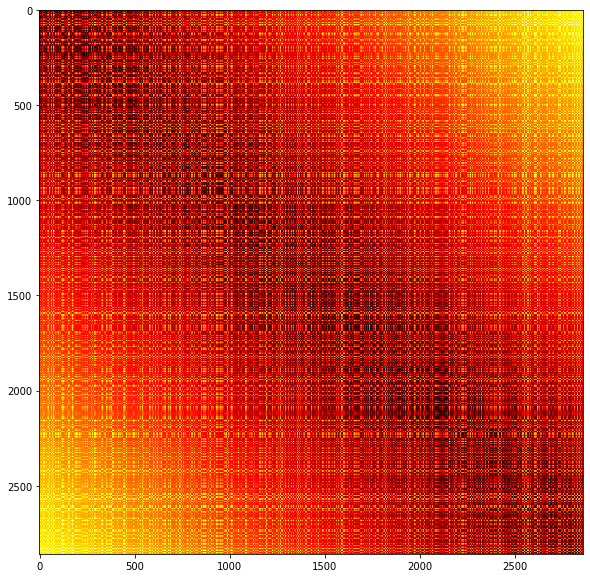

In [6]:
"""matrix plot"""

fig = plt.figure(figsize=(10,10))
plt.imshow(dst_m, cmap='hot', interpolation='None')

In [7]:
%%time
"""threshold cut"""

dst_nm = dst_m.values

md_m = dst_m[(dst_m < th)]

CPU times: user 812 ms, sys: 60 ms, total: 872 ms
Wall time: 773 ms


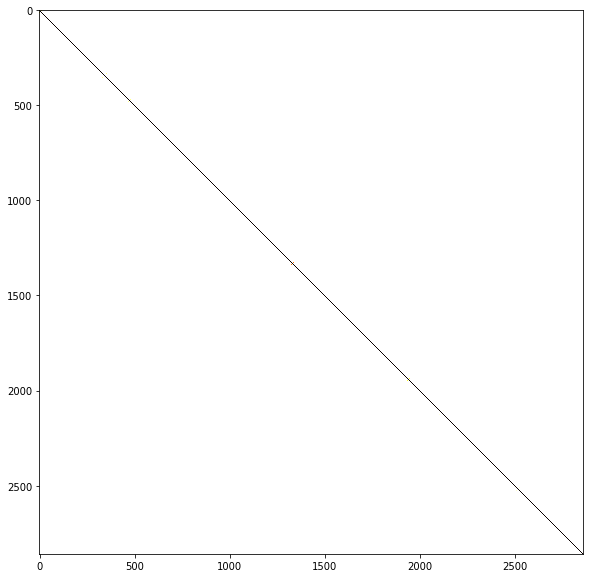

In [8]:
fig = plt.figure(figsize=(10,10))
plt.imshow(md_m, cmap='hot', aspect='equal', interpolation='None')
fig.savefig("dtsm-imshow2.png", dpi=100)

In [16]:
ra1, de1 = df[0][c2m[0]],df[0][c2m[1]]
ra2, de2 = df[1][c2m[0]],df[1][c2m[1]]

In [17]:
%%time

cl1 = ['nmA']*len(ra1)
cl2 = ['nmB']*len(ra2)


for i, ra, de in zip(range(len(ra1)),ra1,de1):
    d = np.sqrt(((ra-ra2)*np.cos(de*np.pi/180.))**2.+(de-de2)**2.)

    if(len(np.where(d < th)[0]) > 0):
        k  = np.argwhere((d < th) & (d == d.min()))[0][0]
        dk = np.sqrt(((ra1-ra2[k])*np.cos(de2[k]*np.pi/180.))**2.+(de1-de2[k])**2.)
        el = np.argwhere((dk<th) & (dk == dk.min()))[0][0]
        cl1[el] = i
        cl2[k]  = i
        
df[0]['idMA'] = cl1
df[1]['idMB'] = cl2

CPU times: user 11.6 s, sys: 174 µs, total: 11.6 s
Wall time: 11.6 s


In [18]:
pdm = pd.merge(df[0],df[1], how = 'outer', left_on=['idMA'], right_on=['idMB'])

pdm[c2m[0]] = pdm[[c2m[0]+'_x',c2m[0]+'_y']].mean(axis=1)
pdm[c2m[1]] = pdm[[c2m[1]+'_x',c2m[1]+'_y']].mean(axis=1)

In [19]:
pdm.to_csv('match-out-catalog.csv', index = True, index_label = 'id')

In [20]:
corr_ra=pdm[c2m[0]+'_x'].corr(pdm[c2m[0]+'_y'])
corr_de=pdm[c2m[1]+'_x'].corr(pdm[c2m[1]+'_y'])
corr_rajy=pdm[c2m[0]].corr(pdm[c2m[0]+'_y'])
corr_dejy=pdm[c2m[1]].corr(pdm[c2m[1]+'_y'])
corr_rajx=pdm[c2m[0]].corr(pdm[c2m[0]+'_x'])
corr_dejx=pdm[c2m[1]].corr(pdm[c2m[1]+'_x'])

corr_ra, corr_de, corr_rajy, corr_dejy, corr_rajx, corr_dejx

(0.9999973122198328,
 0.9999973046390387,
 0.999999785700939,
 0.999999807381555,
 0.9999993511839989,
 0.9999993424285512)